# Road Traffic Sign Dectection & Recognition - MSc Research Project

***
* #### Name               :`Namitha Menon Kakkanat`
* #### Student ID         :`2021117887`
* #### Course Name        :`MSc Artificial Intelligence & Data Science`
* #### Module Name        :`MSc Research Project (771764_A21_T3A)`
* #### Project Supervisor :`Dr.Kevin A Pimbblet`
* #### Dataset Name       :`GTSRB - German Traffic Sign Recognition Benchmark`  
* #### Dataset Link       :`https://www.kaggle.com/datasets/meowmeowmeowmeowmeow/gtsrb-german-traffic-sign`
***

* **Importing Neccessary libraries required for the classifier**

In [2]:
import cv2
import os                                                          # To iterate over all the classes 
import pandas as pd
import numpy as np
import matplotlib as plt                                           # To visualize the graphs
import matplotlib.pyplot 
import matplotlib.image as mpimg
import tensorflow 
import PIL                                                         # To open image content into an array
from PIL import Image                                              # To represent PIL Image
from sklearn.model_selection import train_test_split               # To split dataset into test and train
from tensorflow.keras.utils import to_categorical                  # To convert the labels into one-hot encoding
import keras
from keras.models import Sequential                                # To arrange layers in sequential order
from keras.layers import Conv2D, MaxPool2D,Dropout,Dense, Flatten  # To create neural network
from sklearn.metrics import accuracy_score                         # To calculate the accuracy score
import visualkeras                                                 # To visualize Keras neural network architecture
import random                                                      
import warnings
warnings.filterwarnings("ignore", category=DeprecationWarning) 
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay  # Calling confusion matrix for visualization

# Data Preparation

* **To store all images and their labels into lists**

In [3]:
data = []
labels = []
classes = 43
current_path = os.getcwd()                                            # To get current location path.

# Iterating through all classes to append images and labels to the data and labels list.
for i in range(classes):
    path = os.path.join(current_path,'Data_set\\train',str(i))
    images = os.listdir(path)
    for a in images:
        try:
            image = Image.open(path + '\\'+ a)                    # To open the image from mentioned path.
            image = image.resize((30,30))                         # Image resize to default shape.
            image = np.array(image)
            data.append(image)                                    # To store all the images and their labels into lists (data and labels).
            labels.append(i)
        except:
            print("Error loading image")
            
data = np.array(data)                                             # Converting data list into numpy array for feeding into the model.
labels = np.array(labels)                                         # Converting labels list into numpy array for feeding into th model.
print(data.shape, labels.shape)

FileNotFoundError: [WinError 3] The system cannot find the path specified: 'C:\\Users\\namit\\Desktop\\Final Project AI\\To be upload\\771764_A21_T3A_MSc_Research_Project_Code_Namitha\\Data_set\\train\\0'

* **Spliting training & testing data**

In [1]:
#Test & Train Split of dataset
x_train,x_test,y_train,y_test =train_test_split(data, labels,test_size=0.2,random_state=42)
print(x_train.shape , x_test.shape , y_train.shape , y_test.shape)

NameError: name 'train_test_split' is not defined

# Data Visualization

In [6]:
# Overview of the dataset
classes_count = np.unique(y_train).shape[0]
print("Number of training examples =", x_train.shape[0])
print("Number of testing examples =", x_test.shape[0])
print("Image data shape =", x_train.shape[1:])
print("Number of classes =", classes_count)

Number of training examples = 31367
Number of testing examples = 7842
Image data shape = (30, 30, 3)
Number of classes = 43


Text(0.5, 1.0, 'HISTOGRAM - TEST SAMPLES')

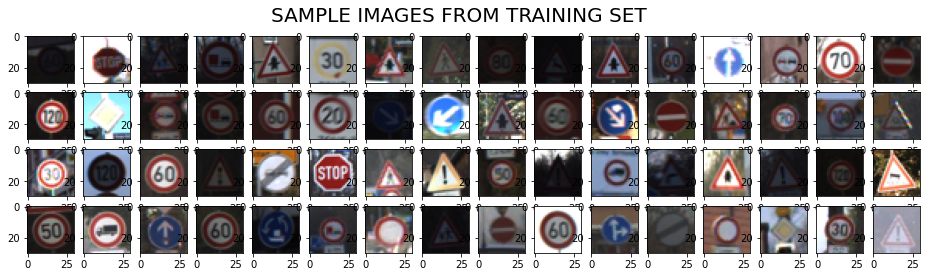

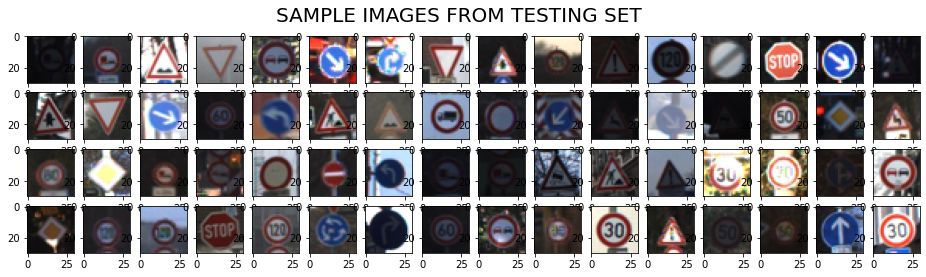

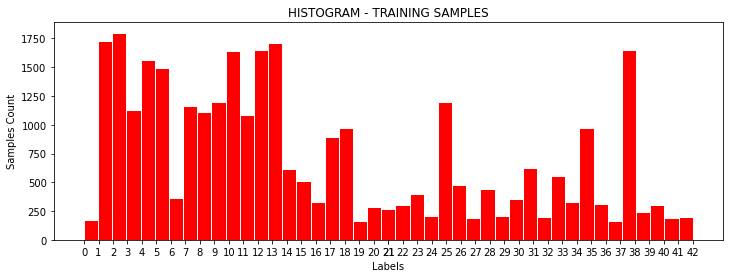

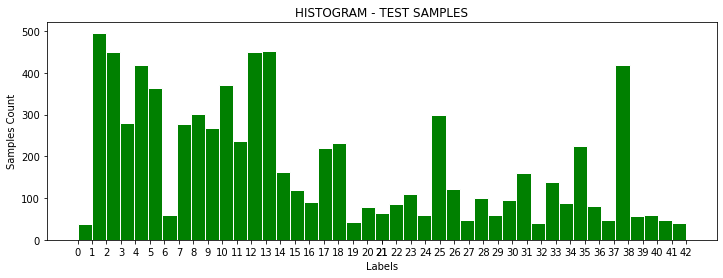

In [23]:
get_ipython().magic('matplotlib inline')

"""
@desc     Function to visualize the images from dataset
@param    image_array : input image array to be visualize
          grid_x      : number of images required on x axis
          grid_y      : number of images required on y axis
          title       : Title for the visualization
"""
def get_sample_images(image_array, grid_x, grid_y, title):
    fig = plt.figure(figsize=(grid_x,grid_y))
    fig.suptitle(title, fontsize=20)
 
    for i in range(1,grid_y*grid_x+1):
        index = random.randint(0, len(image_array))
        image = image_array[index].squeeze()
       
        plt.subplot(grid_y,grid_x,i)
        plt.imshow(image)                                                         # To create an image from a 2-dimensional numpy array. 
        
get_sample_images(x_train, 16, 4, 'SAMPLE IMAGES FROM TRAINING SET')              # To visualize the images from training set.
        
get_sample_images(x_test, 16, 4, 'SAMPLE IMAGES FROM TESTING SET')                # To visualize the images from testing set.
    
# To visualize the histogram of training set
fig = plt.figure(figsize=(12,4))
n, bins, patches = plt.hist(y_train, classes_count,edgecolor='white',color = 'r')
plt.xlabel('Labels')
plt.xticks(np.round(bins))
plt.ylabel('Samples Count')
plt.title('HISTOGRAM - TRAINING SAMPLES')

# To visualize the histogram of testing set
fig = plt.figure(figsize=(12,4))
n1, bins1, patches1 = plt.hist(y_test, classes_count,edgecolor='white',color = 'g')
plt.xlabel('Labels')
plt.xticks(np.round(bins1))
plt.ylabel('Samples Count')
plt.title('HISTOGRAM - TEST SAMPLES')

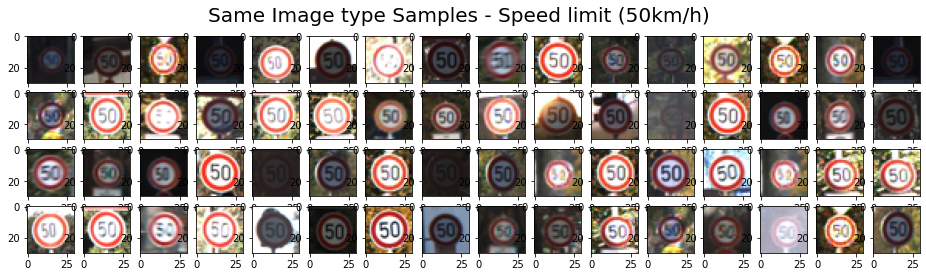

In [61]:
# To visualize the same type image samples in the training set
x_train_temp_label = x_train[np.where(y_train==2)]                                              # label 2 stands for 50km/h
get_sample_images(x_train_temp_label, 16, 4, 'Same Image type Samples - Speed limit (50km/h)')  # function call

In [62]:
# To convert all the labels present in y_train and y_test into one-hot encoding.
y_train = to_categorical(y_train, 43)
y_test = to_categorical(y_test, 43)

# Building CNN Model

In [63]:
# Convolutional Neural Network Model creation
"""
@desc   The model consist of Four 2D convolutional layers, 
        two 2D max pooling layers, two drop out layers, 
        two fully connected layers and one flatten method.
"""
# To  arrange the Keras layers in a sequential order for better memory management.
model = Sequential()           
# 2D Convolutional Layer.
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu', input_shape=x_train.shape[1:]))
# 2D Convolutional Layer.
model.add(Conv2D(filters=32, kernel_size=(5,5), activation='relu'))
# 2D Max Pooling Layer.
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout Layer with 25%.
model.add(Dropout(rate=0.25))
# 2D Convolutional Layer.
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# 2D Convolutional Layer.
model.add(Conv2D(filters=64, kernel_size=(3, 3), activation='relu'))
# 2D Max Pooling Layer.
model.add(MaxPool2D(pool_size=(2, 2)))
# Dropout Layer with 25% neurons drop.
model.add(Dropout(rate=0.25))
# Flatten method to reduce into single dimension.
model.add(Flatten())
# Dense Layer with ReLU.
model.add(Dense(256, activation='relu'))
# Dropout Layer with 50% neurons drop.
model.add(Dropout(rate=0.5))
# Dense Layer with softmax.
model.add(Dense(43, activation='softmax'))

# Train & validate the model

In [64]:
# Compilation of the model.
# Using adam optimizer to perform well and categorical_crossentropy as loss, since there are multiple classes to categorise.

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])
epochs = 15

# Training the model using model.fit()
history = model.fit(x_train, y_train, batch_size=32, epochs=epochs, validation_data=(x_test, y_test))
# Model saving.
model.save("Traffic_Sign_AI_Model.h5")

Epoch 1/15
981/981 [==============================] - 73s 73ms/step - loss: 1.9931 - accuracy: 0.4754 - val_loss: 0.7452 - val_accuracy: 0.8184
Epoch 2/15
981/981 [==============================] - 73s 75ms/step - loss: 0.8330 - accuracy: 0.7505 - val_loss: 0.2908 - val_accuracy: 0.9248
Epoch 3/15
981/981 [==============================] - 73s 75ms/step - loss: 0.5552 - accuracy: 0.8310 - val_loss: 0.1693 - val_accuracy: 0.9547
Epoch 4/15
981/981 [==============================] - 72s 73ms/step - loss: 0.4229 - accuracy: 0.8749 - val_loss: 0.1214 - val_accuracy: 0.9654
Epoch 5/15
981/981 [==============================] - 71s 72ms/step - loss: 0.3383 - accuracy: 0.8997 - val_loss: 0.0862 - val_accuracy: 0.9749
Epoch 6/15
981/981 [==============================] - 70s 71ms/step - loss: 0.3141 - accuracy: 0.9071 - val_loss: 0.1105 - val_accuracy: 0.9675
Epoch 7/15
981/981 [==============================] - 66s 67ms/step - loss: 0.2786 - accuracy: 0.9198 - val_loss: 0.0734 - val_accuracy:

In [185]:
# Summary of the Model
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 26, 26, 32)        2432      
                                                                 
 conv2d_1 (Conv2D)           (None, 22, 22, 32)        25632     
                                                                 
 max_pooling2d (MaxPooling2D  (None, 11, 11, 32)       0         
 )                                                               
                                                                 
 dropout (Dropout)           (None, 11, 11, 32)        0         
                                                                 
 conv2d_2 (Conv2D)           (None, 9, 9, 64)          18496     
                                                                 
 conv2d_3 (Conv2D)           (None, 7, 7, 64)          36928     
                                                        

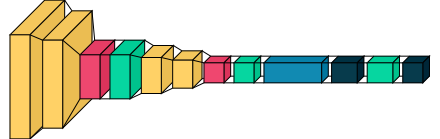

In [188]:
# To visualize Keras neural network architecture
visualkeras.layered_view(model).show() 
visualkeras.layered_view(model)

# Visualization for Accuracy & Loss

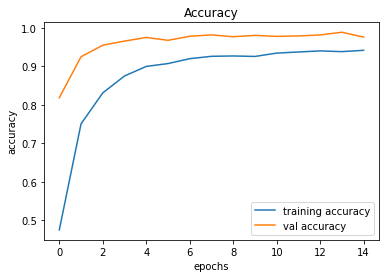

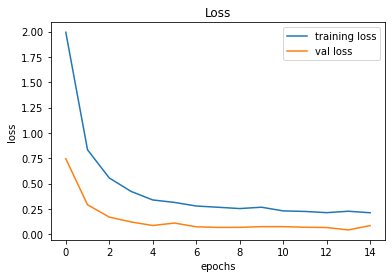

In [66]:
# Plotting graphs for accuracy and loss using matplotlib.
plt.figure(0)
plt.plot(history.history['accuracy'], label='training accuracy')
plt.plot(history.history['val_accuracy'], label='val accuracy')
plt.title('Accuracy')
plt.xlabel('epochs')
plt.ylabel('accuracy')
plt.legend()
plt.show()
plt.figure(1)
plt.plot(history.history['loss'], label='training loss')
plt.plot(history.history['val_loss'], label='val loss')
plt.title('Loss')
plt.xlabel('epochs')
plt.ylabel('loss')
plt.legend()
plt.show()

# Test model with test dataset

In [67]:
# Testing accuracy on test dataset
y_test = pd.read_csv('Data_set\\Test.csv')         # It contains the details related to the image path and their respective class labels.
labels = y_test["ClassId"].values
imgs = y_test["Path"].values
data=[]
for img in imgs:
    imgName='Data_set\\'+img
    image = Image.open(imgName)
    image = image.resize((30,30))                 # Image resizing to feed the test data into trained model
    data.append(np.array(image))
X_test=np.array(data)
pred = np.argmax(model.predict(X_test), axis=-1)

#Accuracy with the test data prediction
print(accuracy_score(labels, pred))

395/395 [==============================] - 7s 17ms/step
0.9333333333333333


In [68]:
#Saving the model
model.save('traffic_sign_AI_CNN_model.h5')

# Test Model with new images

1/1 [==============================] - 0s 28ms/step


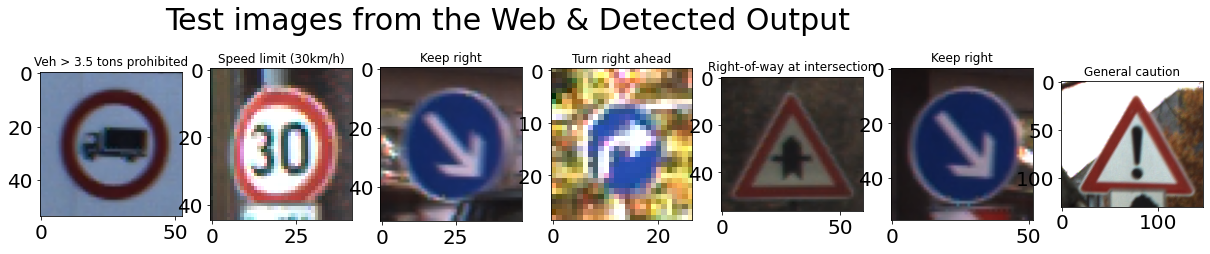

In [180]:
img_folder = 'Data_set\\imgTest\\'                  # It contains the new images downloaded from internet
test_images = []
fig = plt.figure(figsize=(30,4))
fig.suptitle('Test images from the Web & Detected Output', fontsize=30,horizontalalignment='right', verticalalignment='top')

# Dictionary to label all traffic signs class.
classes = { 1:'Speed limit (20km/h)',
            2:'Speed limit (30km/h)', 
            3:'Speed limit (50km/h)', 
            4:'Speed limit (60km/h)', 
            5:'Speed limit (70km/h)', 
            6:'Speed limit (80km/h)', 
            7:'End of speed limit (80km/h)', 
            8:'Speed limit (100km/h)', 
            9:'Speed limit (120km/h)', 
            10:'No passing', 
            11:'No passing veh over 3.5 tons', 
            12:'Right-of-way at intersection', 
            13:'Priority road', 
            14:'Yield', 
            15:'Stop', 
            16:'No vehicles', 
            17:'Veh > 3.5 tons prohibited', 
            18:'No entry', 
            19:'General caution', 
            20:'Dangerous curve left', 
            21:'Dangerous curve right', 
            22:'Double curve', 
            23:'Bumpy road', 
            24:'Slippery road', 
            25:'Road narrows on the right', 
            26:'Road work', 
            27:'Traffic signals', 
            28:'Pedestrians', 
            29:'Children crossing', 
            30:'Bicycles crossing', 
            31:'Beware of ice/snow',
            32:'Wild animals crossing', 
            33:'End speed + passing limits', 
            34:'Turn right ahead', 
            35:'Turn left ahead', 
            36:'Ahead only', 
            37:'Go straight or right', 
            38:'Go straight or left', 
            39:'Keep right', 
            40:'Keep left', 
            41:'Roundabout mandatory', 
            42:'End of no passing', 
            43:'End no passing veh > 3.5 tons' }

#load the trained model to classify traffic sign
from keras.models import load_model
model = load_model('traffic_sign_AI_CNN_model.h5')

"""
@desc     Function to predict the traffic sign, ie., converting the image into the dimension of shape
@param    file_path : File path of the image
@return   labels : label containing the name of the traffic sign
"""
def classify(file_path):
    global label_packed
    image = Image.open(file_path)
    image = image.resize((30,30))
    image = np.expand_dims(image, axis=0)
    image = np.array(image)
    predict_x=model.predict([image])
    classes_x=np.argmax(predict_x,axis=1)
    return classes[classes_x[0]+1]
 
# Traffic Sign Image plotting with the correct labels

cnt = 0
for img_name in os.listdir(img_folder):
    image = mpimg.imread(img_folder+img_name)
    cnt = cnt+1
    title = classify(img_folder+img_name) 
    sub=plt.subplot(1,10,cnt)
    sub.set_title(title, fontsize=12)
    plt.imshow(image)

# CONFUSION MATRIX

In [104]:
# Defining list with labels
labels = ['Speed limit (20km/h)','Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)','Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing veh over 3.5 tons', 'Right-of-way at intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles','Veh > 3.5 tons prohibited', 'No entry', 'General caution', 'Dangerous curve left', 'Dangerous curve right', 'Double curve','Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals','Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow','Wild animals crossing', 'End speed + passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End no passing veh > 3.5 tons' ]
# Showing labels
print(labels)

# Generating Numpy array with True classes' indexes
y_true = np.random.randint(low=0, high=43, size=500, dtype=int)
print(y_true)

# Calculating number of samples for every class
# Iterating all classes' indexes in 'y_true' array
# Using Numpy function 'unique'
# Returning sorted unique elements and their frequencies
classesIndexes, classesFrequency = np.unique(y_true, return_counts=True)

# Printing frequency (number of samples) for every class
print('classes indexes:' , classesIndexes)
print('\n')
print('classes frequency:', classesFrequency)

['Speed limit (20km/h)', 'Speed limit (30km/h)', 'Speed limit (50km/h)', 'Speed limit (60km/h)', 'Speed limit (70km/h)', 'Speed limit (80km/h)', 'End of speed limit (80km/h)', 'Speed limit (100km/h)', 'Speed limit (120km/h)', 'No passing', 'No passing veh over 3.5 tons', 'Right-of-way at intersection', 'Priority road', 'Yield', 'Stop', 'No vehicles', 'Veh > 3.5 tons prohibited', 'No entry', 'General caution', 'Dangerous curve left', 'Dangerous curve right', 'Double curve', 'Bumpy road', 'Slippery road', 'Road narrows on the right', 'Road work', 'Traffic signals', 'Pedestrians', 'Children crossing', 'Bicycles crossing', 'Beware of ice/snow', 'Wild animals crossing', 'End speed + passing limits', 'Turn right ahead', 'Turn left ahead', 'Ahead only', 'Go straight or right', 'Go straight or left', 'Keep right', 'Keep left', 'Roundabout mandatory', 'End of no passing', 'End no passing veh > 3.5 tons']
30
classes indexes: [30]


classes frequency: [1]


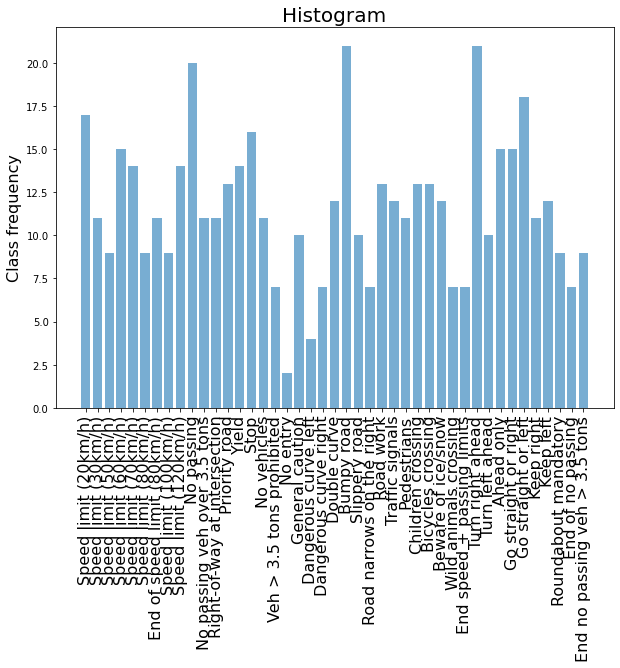

In [98]:
# Magic function that renders the figure in a jupyter notebook
%matplotlib inline

# Setting default size of the plot
plt.rcParams['figure.figsize'] = (10.0, 7.0)
figure = plt.figure()

# Plotting Bar chart
plt.bar(classesIndexes, classesFrequency, align='center', alpha=0.6)
plt.ylabel('Class frequency', fontsize=16)
plt.xticks(classesIndexes, labels, fontsize=16,rotation = 90)
plt.title('Histogram', fontsize=20)
figure.savefig('histogram.png', transparent=True, dpi=500)
plt.show()

In [99]:
# Making copy of array with True classes' indexes
y_predicted = np.copy(y_true)
# Choosing randomly 25% of classes to be changed
ii = np.random.randint(low=0, high=len(y_true), size=int(0.25 * len(y_true)), dtype=int)
print(ii)

[413 156 335 227 284 165 478 113 369 327  18 268  53  97 284 215 170  26
 123 386 201 308 185 126 142 387  67 293 482 175 123 459 371 293 318  10
 447 491  90 196 285 451 342 213 439 271 222  41 221 463  74 367 406 359
 155 341 232 315 338 315  42 330  64 239 145  47  70 105  30  21 257 328
  45 211 310 100 304 240  31 311  65  76 139 439 244 173 157 420  50 287
 152 118 103  22 261 380  57 360 172 324 380 334   6 286 321 380 153 195
 472 396 211 274 168 179 348 355 311 420  46 229 402   1 389 221 296]


In [100]:
# Iterating chosen indexes and replacing them with other classes' indexes
for i in ii:
    y_predicted[i] = np.random.randint(low=0, high=43, dtype=int)
    # Showing difference between True classes' indexes and Predicted ones
    print('index = {0:2d}, True class => {1}, {2} <= Predicted class'.format(i, y_true[i], y_predicted[i]))

index = 413, True class => 0, 23 <= Predicted class
index = 156, True class => 35, 13 <= Predicted class
index = 335, True class => 32, 2 <= Predicted class
index = 227, True class => 30, 9 <= Predicted class
index = 284, True class => 33, 4 <= Predicted class
index = 165, True class => 42, 7 <= Predicted class
index = 478, True class => 30, 37 <= Predicted class
index = 113, True class => 11, 23 <= Predicted class
index = 369, True class => 21, 7 <= Predicted class
index = 327, True class => 1, 17 <= Predicted class
index = 18, True class => 20, 20 <= Predicted class
index = 268, True class => 2, 14 <= Predicted class
index = 53, True class => 36, 28 <= Predicted class
index = 97, True class => 6, 34 <= Predicted class
index = 284, True class => 33, 40 <= Predicted class
index = 215, True class => 23, 3 <= Predicted class
index = 170, True class => 39, 2 <= Predicted class
index = 26, True class => 3, 39 <= Predicted class
index = 123, True class => 21, 33 <= Predicted class
index = 3

In [101]:
#Computing Confusion Matrix to evaluate accuracy of classification
c_m = confusion_matrix(y_true, y_predicted)

# Showing Confusion Matrix in form of 2D Numpy array
print(c_m)

[[12  1  0 ...  0  0  0]
 [ 0  5  0 ...  0  0  0]
 [ 0  0  7 ...  0  0  0]
 ...
 [ 0  0  0 ...  8  0  0]
 [ 0  0  0 ...  0  5  0]
 [ 0  0  0 ...  0  0  6]]


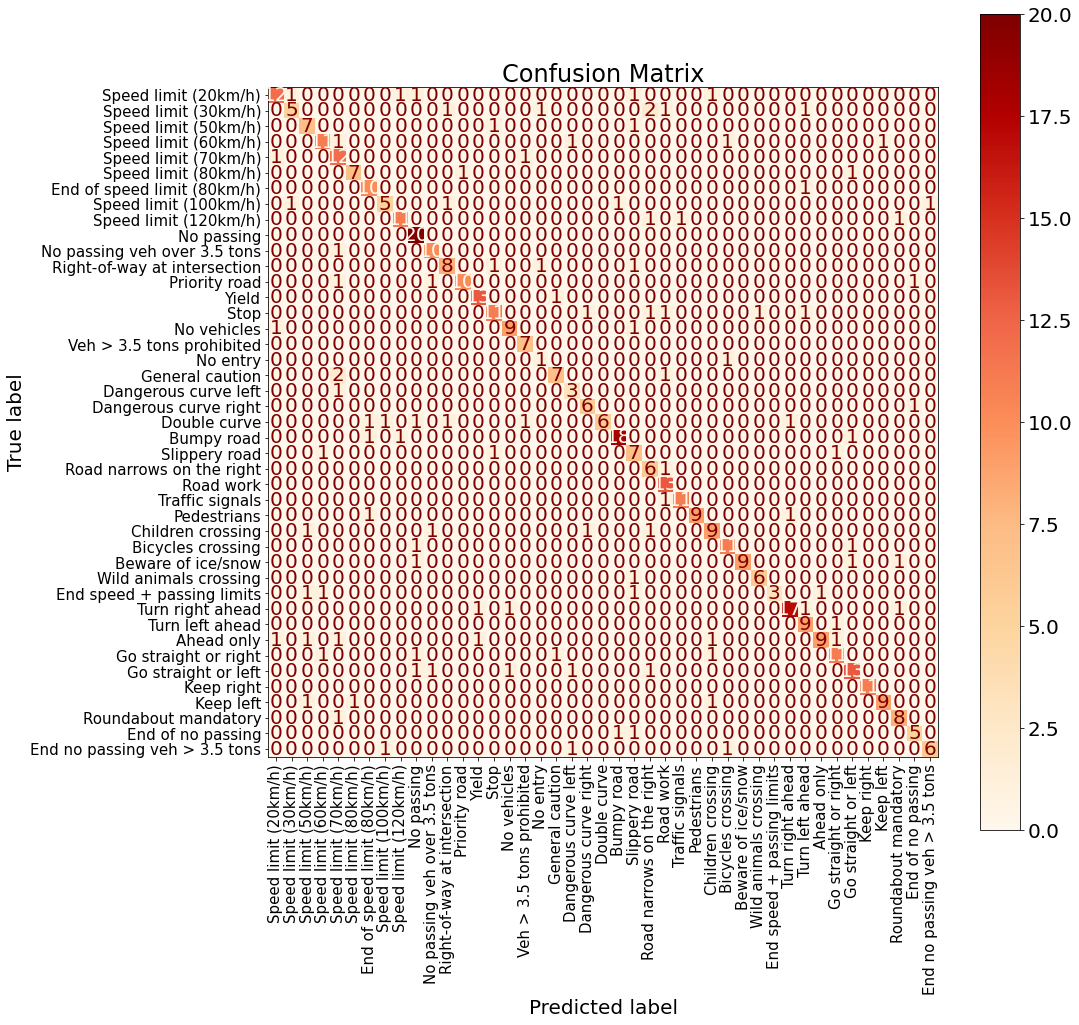

In [103]:
plt.rcParams['figure.figsize'] = (15, 15)
plt.rcParams['font.size'] = 20

# Implementing visualization of Confusion Matrix
display_c_m = ConfusionMatrixDisplay(c_m, display_labels=labels)


# Plotting Confusion Matrix
display_c_m.plot(cmap='OrRd', xticks_rotation=90)
plt.xticks(fontsize=15)
plt.yticks(fontsize=15)
plt.title('Confusion Matrix', fontsize=24)
plt.savefig('confusion_matrix.png', transparent=True, dpi=500)
plt.show()